In [3]:
pip install numpy pandas matplotlib seaborn scikit-learn folium xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
df1=pd.read_csv("1.Dataset for Deforestation (Fire Classification) 2021.csv")

In [6]:
df1.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   28.0993    96.9983       303.0   1.1    1.1  2021-01-01       409   
1   30.0420    79.6492       301.8   1.4    1.2  2021-01-01       547   
2   30.0879    78.8579       300.2   1.3    1.1  2021-01-01       547   
3   30.0408    80.0501       302.0   1.5    1.2  2021-01-01       547   
4   30.6565    78.9668       300.9   1.3    1.1  2021-01-01       547   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          44     6.03       292.6   8.6        D     0  
1     Terra      MODIS          37     6.03       287.4   9.0        D     0  
2     Terra      MODIS           8     6.03       286.5   5.4        D     0  
3     Terra      MODIS          46     6.03       287.7  10.7        D     0  
4     Terra      MODIS          43     6.03       287.6   9.0        D     0

In [7]:
df2=pd.read_csv("2.Dataset for Deforestation (Fire Classification) 2022.csv")

In [8]:
df2.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   30.1138    80.0756       300.0   1.2    1.1  2022-01-01       511   
1   23.7726    86.2078       306.1   1.6    1.2  2022-01-01       512   
2   22.2080    84.8627       304.8   1.4    1.2  2022-01-01       512   
3   23.7621    86.3946       306.9   1.6    1.2  2022-01-01       512   
4   23.6787    86.0891       303.6   1.5    1.2  2022-01-01       512   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS           7     6.03       288.4   7.1        D     0  
1     Terra      MODIS          62     6.03       293.5  10.4        D     2  
2     Terra      MODIS          42     6.03       293.3   5.8        D     2  
3     Terra      MODIS          38     6.03       295.2   9.3        D     2  
4     Terra      MODIS          52     6.03       293.1   7.2        D     2

In [9]:
df3=pd.read_csv("3.Dataset for Deforestation (Fire Classification) 2023.csv")

In [10]:
df3.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0    9.3280    77.6247       318.0   1.1    1.0  2023-01-01       821   
1   10.4797    77.9378       313.8   1.0    1.0  2023-01-01       822   
2   13.2478    77.2639       314.7   1.0    1.0  2023-01-01       822   
3   12.2994    78.4085       314.3   1.0    1.0  2023-01-01       822   
4   14.1723    75.5024       338.4   1.2    1.1  2023-01-01       823   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0      Aqua      MODIS          62    61.03       305.0   7.6        D     0  
1      Aqua      MODIS          58    61.03       299.4   4.3        D     0  
2      Aqua      MODIS          55    61.03       302.4   4.9        D     0  
3      Aqua      MODIS          58    61.03       301.9   4.8        D     0  
4      Aqua      MODIS          88    61.03       305.3  41.5        D     0

In [11]:
df=pd.concat([df1,df2,df3],ignore_index=True)
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   28.0993    96.9983       303.0   1.1    1.1  2021-01-01       409   
1   30.0420    79.6492       301.8   1.4    1.2  2021-01-01       547   
2   30.0879    78.8579       300.2   1.3    1.1  2021-01-01       547   
3   30.0408    80.0501       302.0   1.5    1.2  2021-01-01       547   
4   30.6565    78.9668       300.9   1.3    1.1  2021-01-01       547   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          44     6.03       292.6   8.6        D     0  
1     Terra      MODIS          37     6.03       287.4   9.0        D     0  
2     Terra      MODIS           8     6.03       286.5   5.4        D     0  
3     Terra      MODIS          46     6.03       287.7  10.7        D     0  
4     Terra      MODIS          43     6.03       287.6   9.0        D     0

In [12]:
df.shape

(271217, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [14]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [17]:
df.describe().T

count        mean         std       min       25%       50%  \
latitude    271217.0   23.947505    4.919846    8.1362   20.9655   23.7888   
longitude   271217.0   81.284024    6.559071   68.4526   75.8802   79.3209   
brightness  271217.0  323.719192   14.147221  300.0000  314.5000  322.0000   
scan        271217.0    1.421732    0.630742    1.0000    1.0000    1.2000   
track       271217.0    1.152716    0.201943    1.0000    1.0000    1.1000   
acq_time    271217.0  824.623755  353.966965  321.0000  648.0000  756.0000   
confidence  271217.0   64.065081   18.165329    0.0000   54.0000   66.0000   
version     271217.0   21.933778   24.935515    6.0300    6.0300    6.0300   
bright_t31  271217.0  303.499177    8.282440  267.2000  298.2000  302.5000   
frp         271217.0   27.722058   81.017471    0.0000    8.7000   13.5000   
type        271217.0    0.100385    0.437215    0.0000    0.0000    0.0000   

                 75%        max  
latitude     27.7827    34.9734  
longitude    84.7559    97.1044  
brightness  330.7000   505.7000  
scan          1.5000     4.8000  
track         1.2000     2.0000  
acq_time    825.0000  2202.0000  
confidence   76.0000   100.0000  
version      61.0300    61.0300  
bright_t31  309.2000   400.1000  
frp          24.5000  6961.8000  
type          0.0000     3.0000

In [18]:
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

In [19]:
for col in df.columns:
    if df[col].dtype=="object":
        print(f"Column: {col}")
        print(f"Unique Values {df[col].unique()}")
        print(f"Number of Unique Values: {df[col].nunique()}")
        print("-"* 50)

Column: acq_date
Unique Values ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of Unique Values: 1088
--------------------------------------------------
Column: satellite
Unique Values ['Terra' 'Aqua']
Number of Unique Values: 2
--------------------------------------------------
Column: instrument
Unique Values ['MODIS']
Number of Unique Values: 1
--------------------------------------------------
Column: daynight
Unique Values ['D' 'N']
Number of Unique Values: 2
--------------------------------------------------


Text(0, 0.5, 'Count')

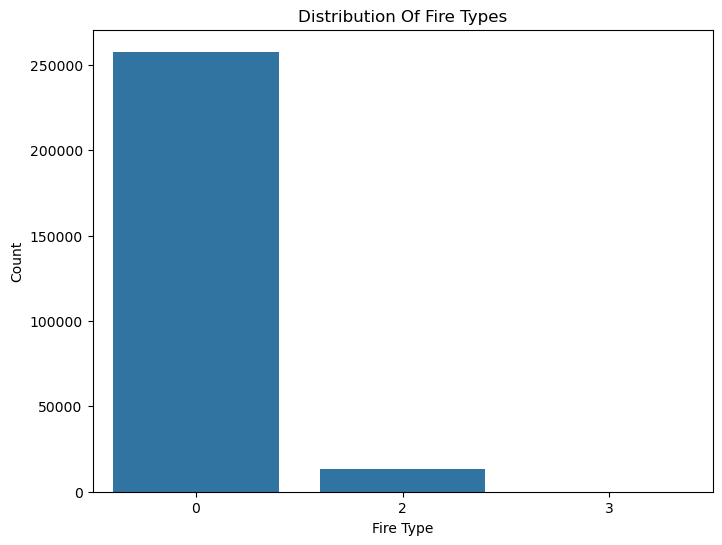

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="type",data=df)
plt.title("Distribution Of Fire Types")
plt.xlabel("Fire Type")
plt.ylabel("Count")

Text(0, 0.5, 'Frequency')

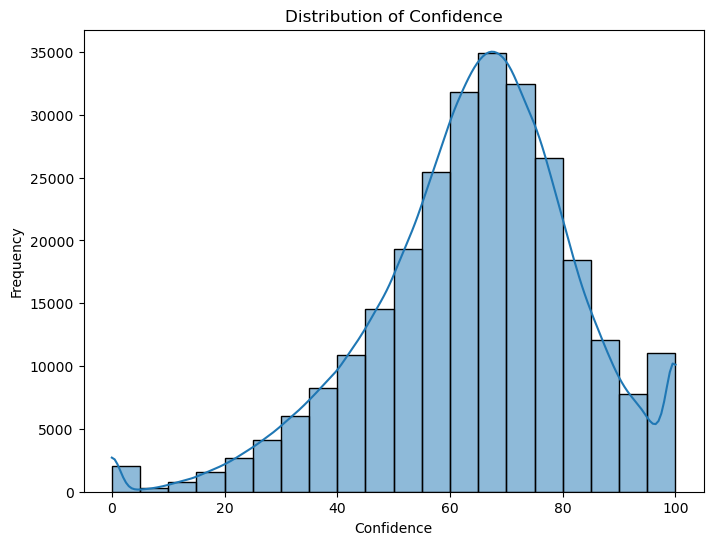

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df["confidence"], bins=20, kde=True)
plt.title("Distribution of Confidence")
plt.xlabel("Confidence")
plt.ylabel("Frequency")

Boxplot for Confidence by fire type

In [22]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   28.0993    96.9983       303.0   1.1    1.1  2021-01-01       409   
1   30.0420    79.6492       301.8   1.4    1.2  2021-01-01       547   
2   30.0879    78.8579       300.2   1.3    1.1  2021-01-01       547   
3   30.0408    80.0501       302.0   1.5    1.2  2021-01-01       547   
4   30.6565    78.9668       300.9   1.3    1.1  2021-01-01       547   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          44     6.03       292.6   8.6        D     0  
1     Terra      MODIS          37     6.03       287.4   9.0        D     0  
2     Terra      MODIS           8     6.03       286.5   5.4        D     0  
3     Terra      MODIS          46     6.03       287.7  10.7        D     0  
4     Terra      MODIS          43     6.03       287.6   9.0        D     0

<Axes: xlabel='type', ylabel='confidence'>

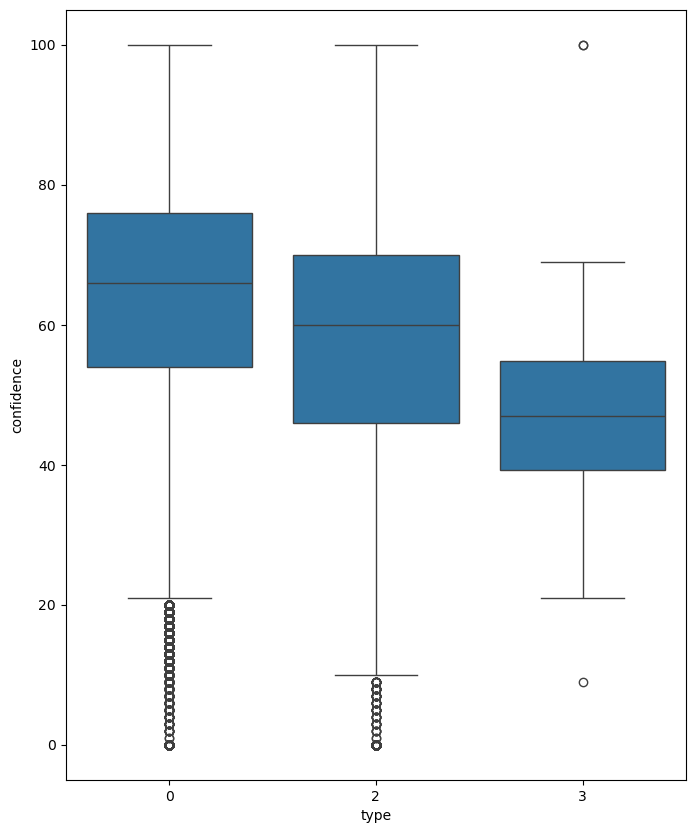

In [23]:
plt.figure(figsize=(8,10))
sns.boxplot(x="type", y="confidence", data=df)

<Axes: xlabel='longitude', ylabel='latitude'>

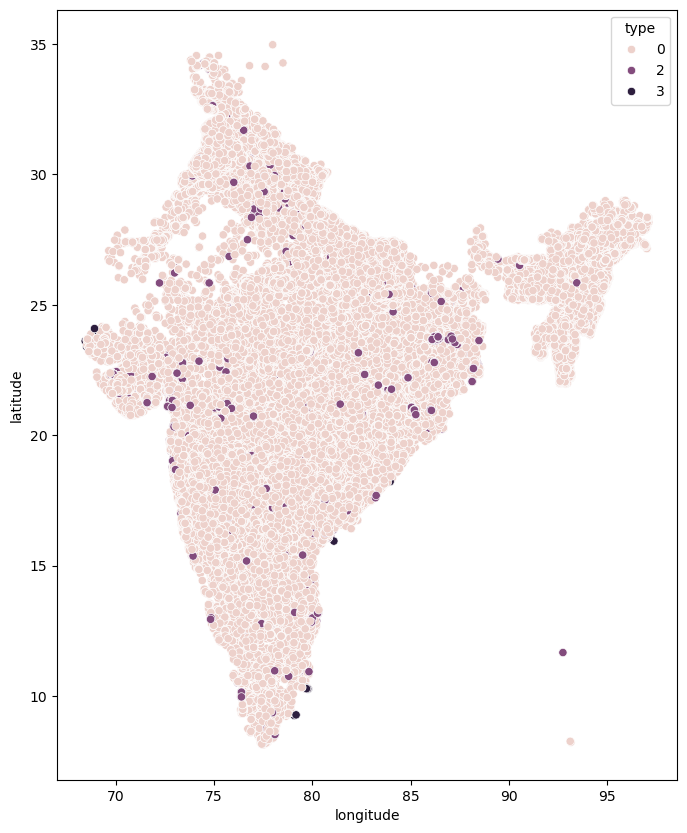

In [24]:
plt.figure(figsize=(8,10))
sns.scatterplot(x="longitude", y="latitude", data=df, hue="type")

<Axes: xlabel='daynight', ylabel='count'>

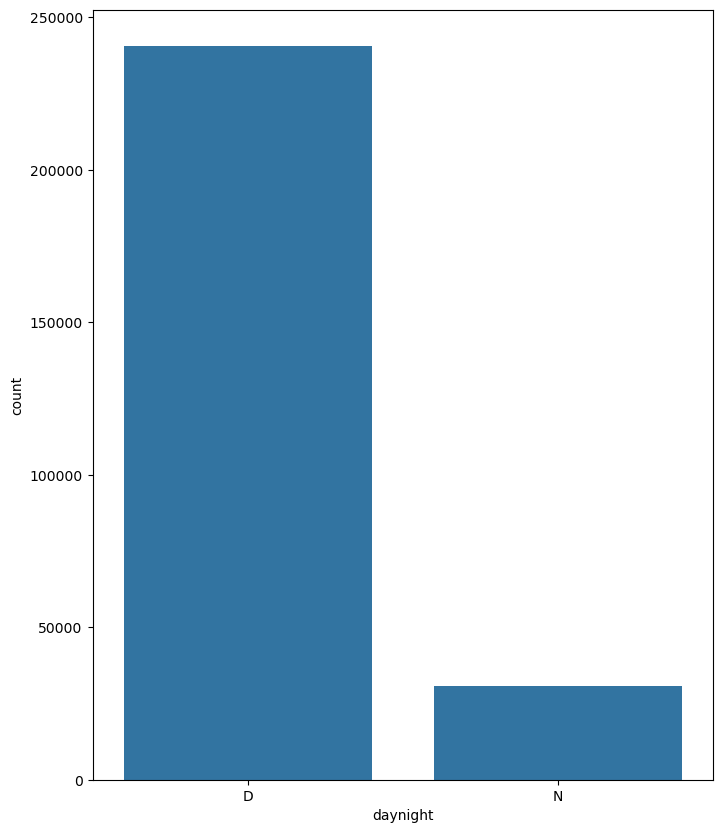

In [25]:
plt.figure(figsize=(8,10))
sns.countplot(x="daynight", data=df)

<Axes: xlabel='satellite', ylabel='count'>

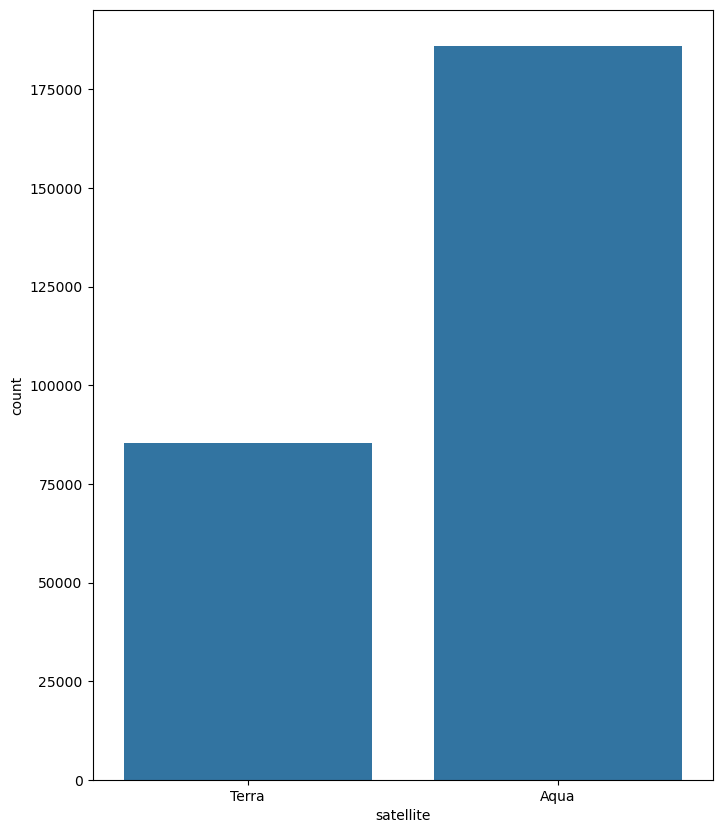

In [26]:
plt.figure(figsize=(8,10))
sns.countplot(x="satellite", data=df)

<Axes: xlabel='version', ylabel='count'>

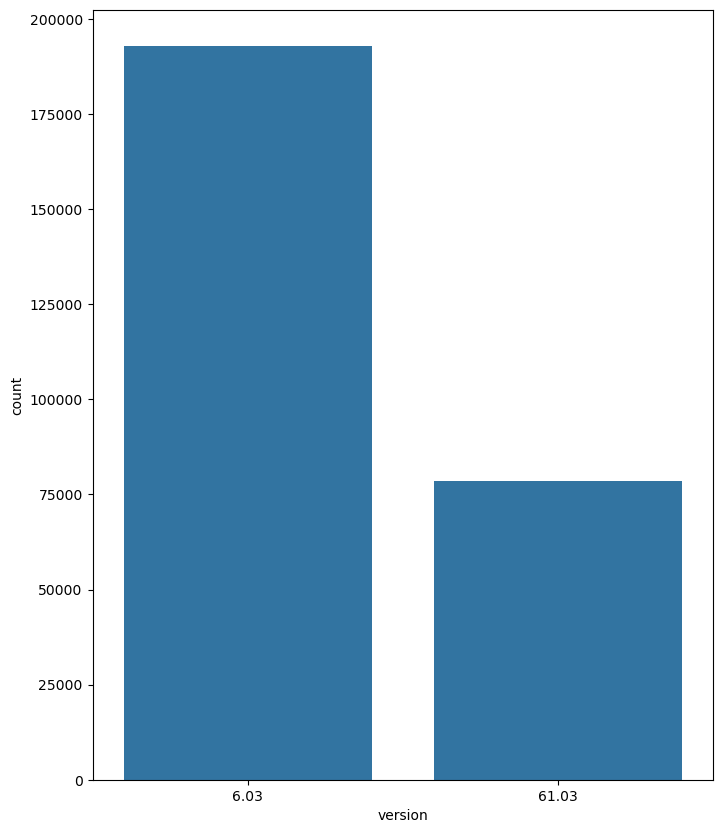

In [27]:
plt.figure(figsize=(8,10))
sns.countplot(x="version", data=df,)

In [28]:
# sns.pairplot(df[['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'type']])

<Axes: >

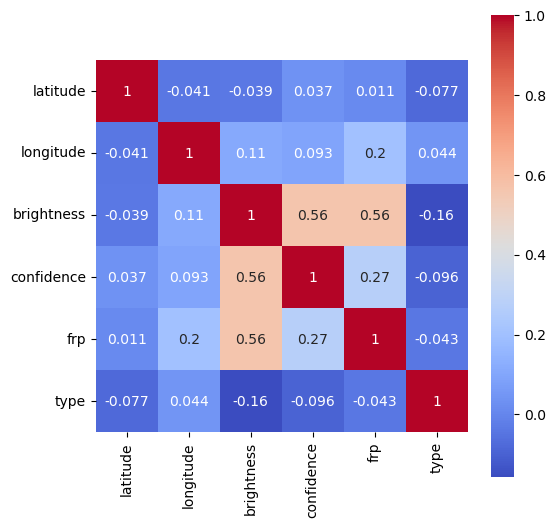

In [29]:
plt.figure(figsize=(6,6))
correlation_matrix=df[["latitude", "longitude", "brightness", "confidence", "frp", "type" ]].corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)

In [30]:
numerical_columns= df.select_dtypes(include=np.number).columns
numerical_columns = numerical_columns[2:-1]

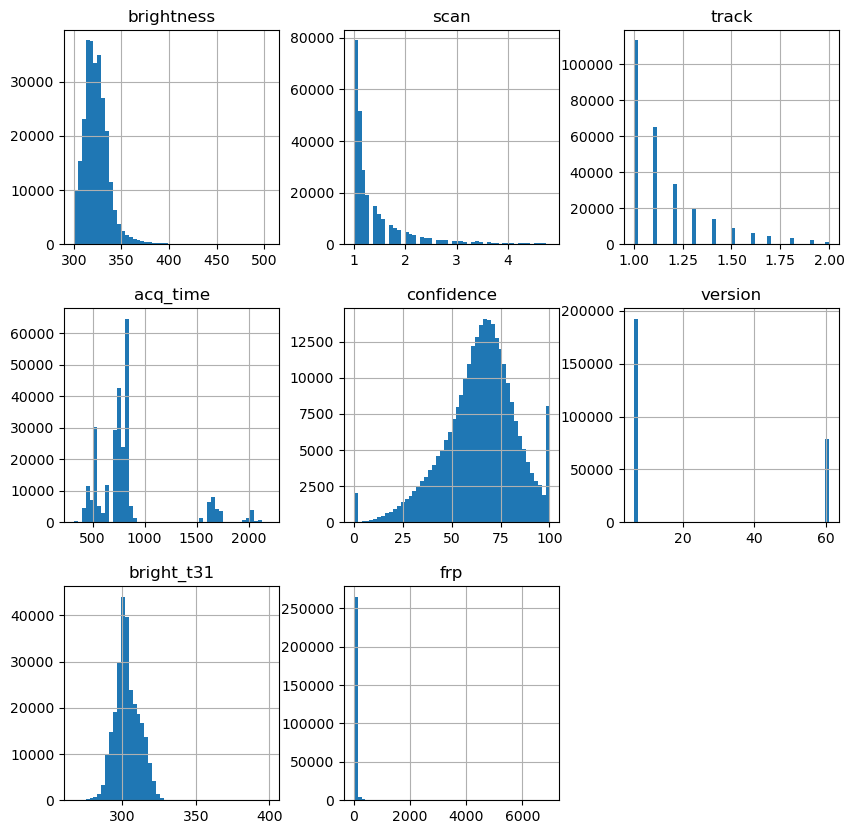

In [31]:
df[numerical_columns].hist(figsize=(10,10), bins=50)
plt.show()

Analizing Didtribution of brightness


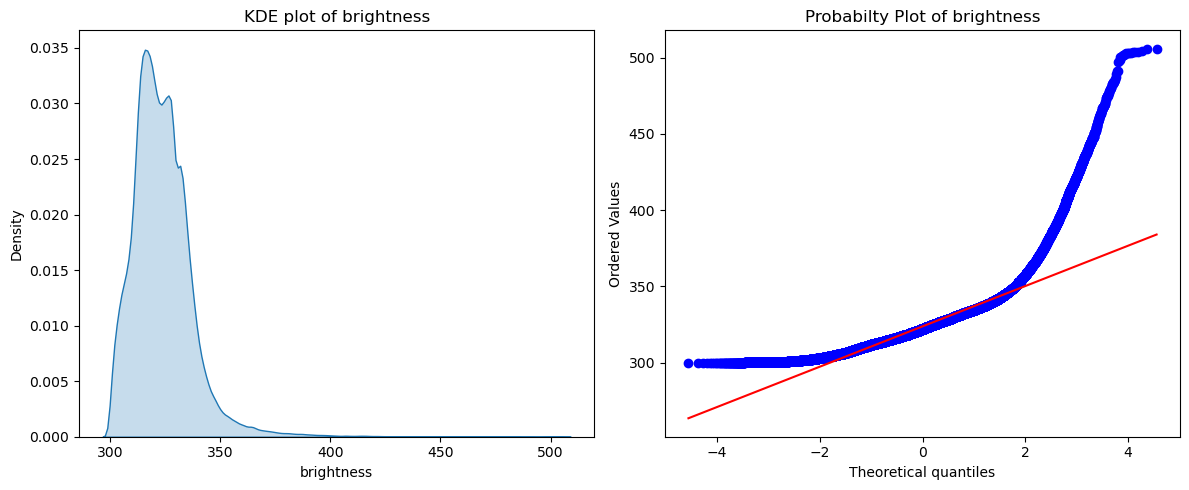

--------------------------------------------------
Analizing Didtribution of scan


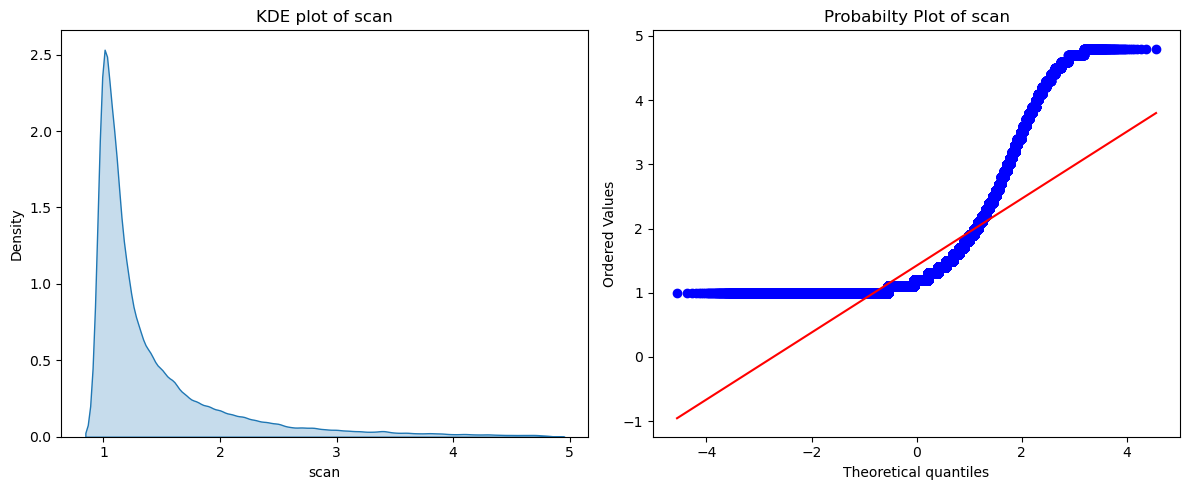

--------------------------------------------------
Analizing Didtribution of track


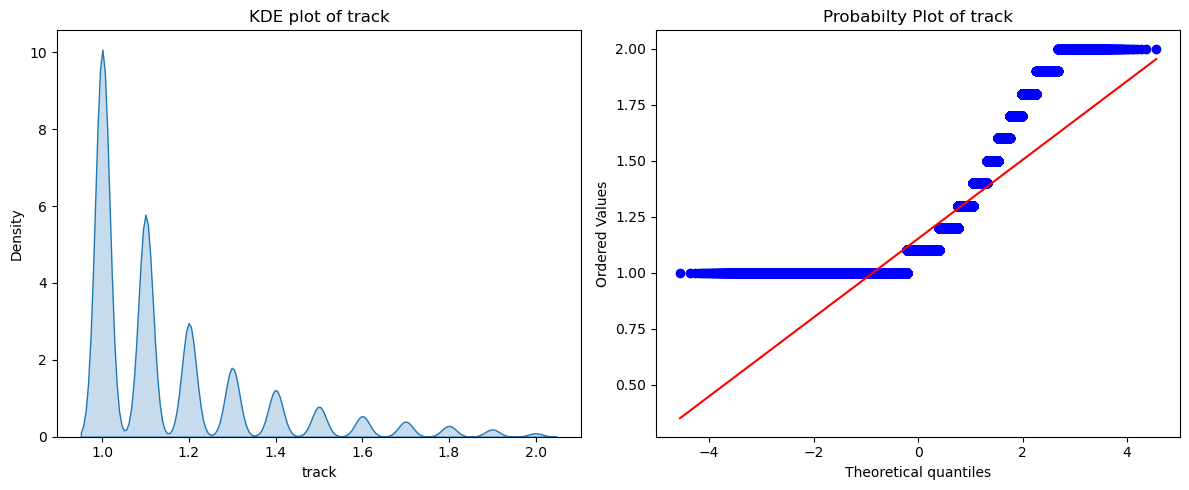

--------------------------------------------------
Analizing Didtribution of acq_time


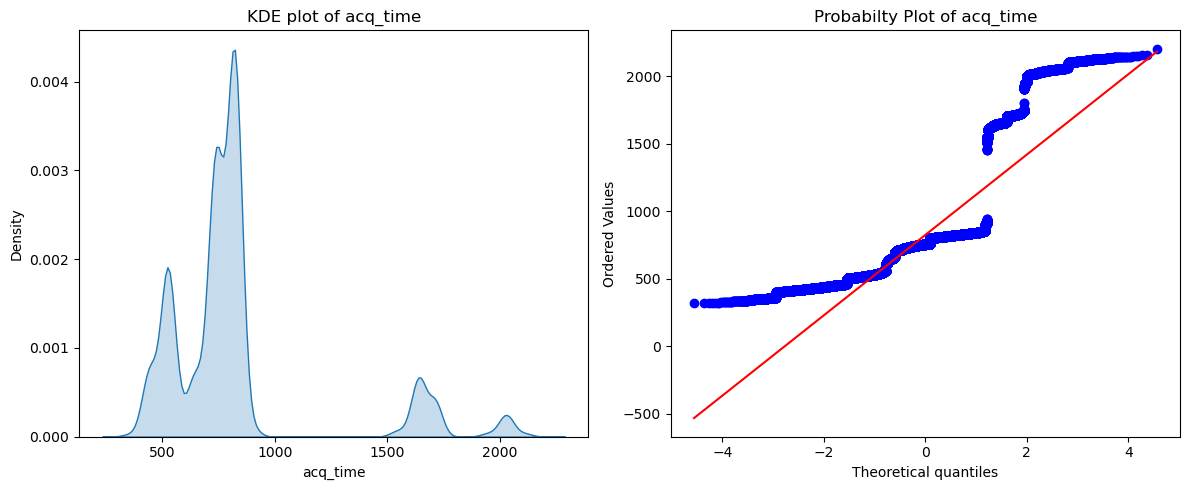

--------------------------------------------------
Analizing Didtribution of confidence


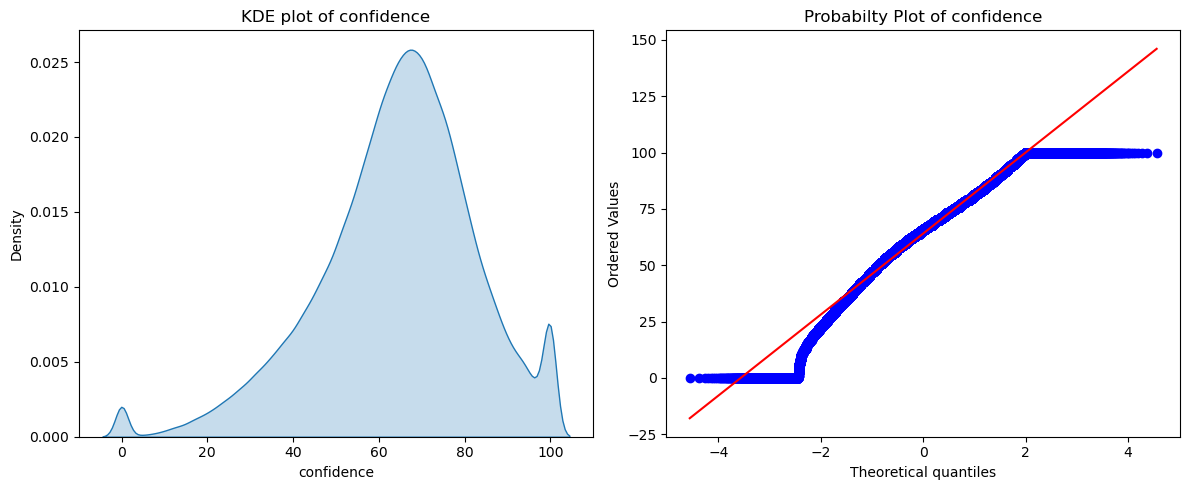

--------------------------------------------------
Analizing Didtribution of version


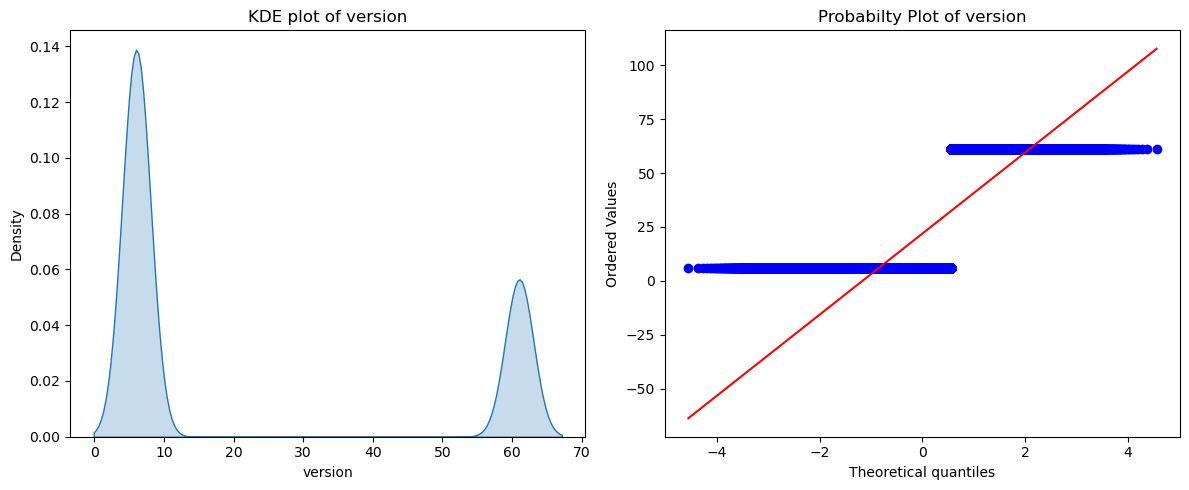

--------------------------------------------------
Analizing Didtribution of bright_t31


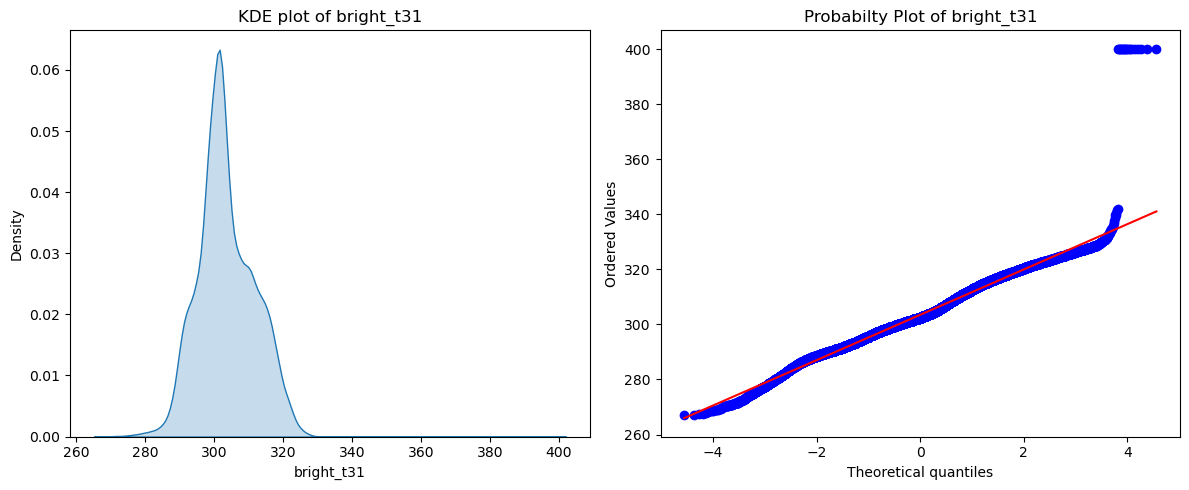

--------------------------------------------------
Analizing Didtribution of frp


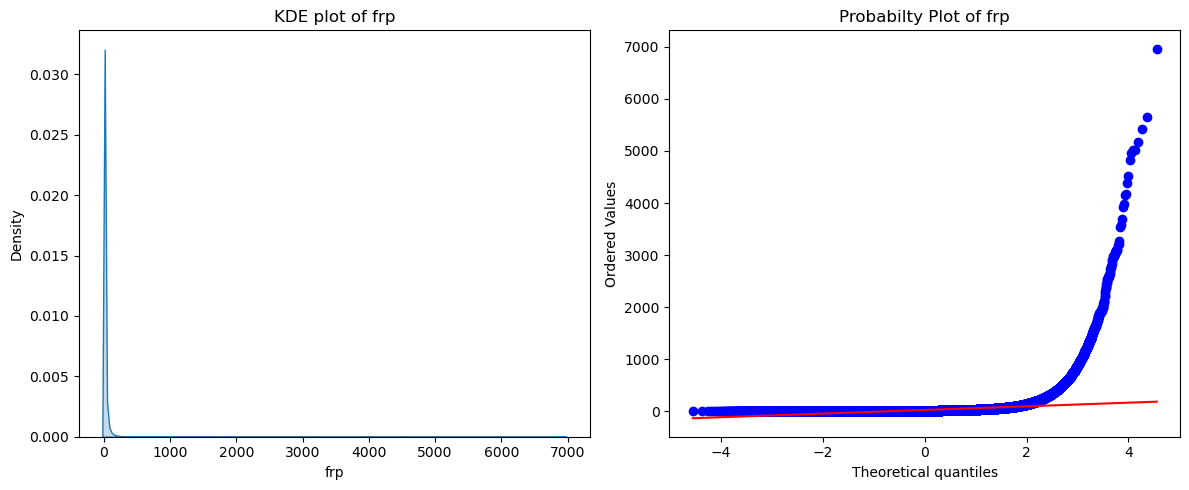

--------------------------------------------------


In [32]:
import statsmodels.api as sm
import scipy.stats as stats

numerical_features=['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']
for feature in numerical_columns:
    print(f"Analizing Didtribution of {feature}")

    #KDE plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f"KDE plot of {feature}")




    # QQ PLot
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist="norm",plot=plt)
    plt.title(f"Probabilty Plot of {feature}")
    
    plt.tight_layout()
    plt.show()
    print("-"*50)

Temporal analysis

In [33]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   28.0993    96.9983       303.0   1.1    1.1  2021-01-01       409   
1   30.0420    79.6492       301.8   1.4    1.2  2021-01-01       547   
2   30.0879    78.8579       300.2   1.3    1.1  2021-01-01       547   
3   30.0408    80.0501       302.0   1.5    1.2  2021-01-01       547   
4   30.6565    78.9668       300.9   1.3    1.1  2021-01-01       547   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          44     6.03       292.6   8.6        D     0  
1     Terra      MODIS          37     6.03       287.4   9.0        D     0  
2     Terra      MODIS           8     6.03       286.5   5.4        D     0  
3     Terra      MODIS          46     6.03       287.7  10.7        D     0  
4     Terra      MODIS          43     6.03       287.6   9.0        D     0

In [34]:
df["acq_date"]=pd.to_datetime(df["acq_date"])
df["year"] = df["acq_date"].dt.year
df["month"] = df["acq_date"].dt.month
df["day_of_week"] = df["acq_date"].dt.dayofweek
df["day_of_year"] = df["acq_date"].dt.dayofyear
df["hour"] = df["acq_date"].astype(str).str[:2].astype(int)


In [35]:
df

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0        28.0993    96.9983       303.0   1.1    1.1 2021-01-01       409   
1        30.0420    79.6492       301.8   1.4    1.2 2021-01-01       547   
2        30.0879    78.8579       300.2   1.3    1.1 2021-01-01       547   
3        30.0408    80.0501       302.0   1.5    1.2 2021-01-01       547   
4        30.6565    78.9668       300.9   1.3    1.1 2021-01-01       547   
...          ...        ...         ...   ...    ...        ...       ...   
271212   17.1067    74.4049       304.0   2.3    1.5 2023-12-31      1715   
271213   16.3284    75.2590       304.2   2.6    1.5 2023-12-31      1715   
271214   21.1095    72.6422       306.5   1.9    1.3 2023-12-31      1716   
271215   21.0664    72.8734       310.0   1.0    1.0 2023-12-31      2125   
271216   21.0679    72.8637       316.9   1.0    1.0 2023-12-31      2125   

       satellite instrument  confidence  version  bright_t31   frp daynight  \
0          Terra      MODIS          44     6.03       292.6   8.6        D   
1          Terra      MODIS          37     6.03       287.4   9.0        D   
2          Terra      MODIS           8     6.03       286.5   5.4        D   
3          Terra      MODIS          46     6.03       287.7  10.7        D   
4          Terra      MODIS          43     6.03       287.6   9.0        D   
...          ...        ...         ...      ...         ...   ...      ...   
271212     Terra      MODIS          58    61.03       289.2  23.2        N   
271213     Terra      MODIS          59    61.03       288.9  29.5        N   
271214     Terra      MODIS          68    61.03       294.2  18.2        N   
271215      Aqua      MODIS          79    61.03       292.7  10.2        N   
271216      Aqua      MODIS          94    61.03       293.1  16.0        N   

        type  year  month  day_of_week  day_of_year  hour  
0          0  2021      1            4            1    20  
1          0  2021      1            4            1    20  
2          0  2021      1            4            1    20  
3          0  2021      1            4            1    20  
4          0  2021      1            4            1    20  
...      ...   ...    ...          ...          ...   ...  
271212     0  2023     12            6          365    20  
271213     0  2023     12            6          365    20  
271214     2  2023     12            6          365    20  
271215     2  2023     12            6          365    20  
271216     2  2023     12            6          365    20  

[271217 rows x 20 columns]

C:\Users\kunsh\AppData\Local\Temp\ipykernel_53868\2449853186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="month", data=df, palette="viridis")


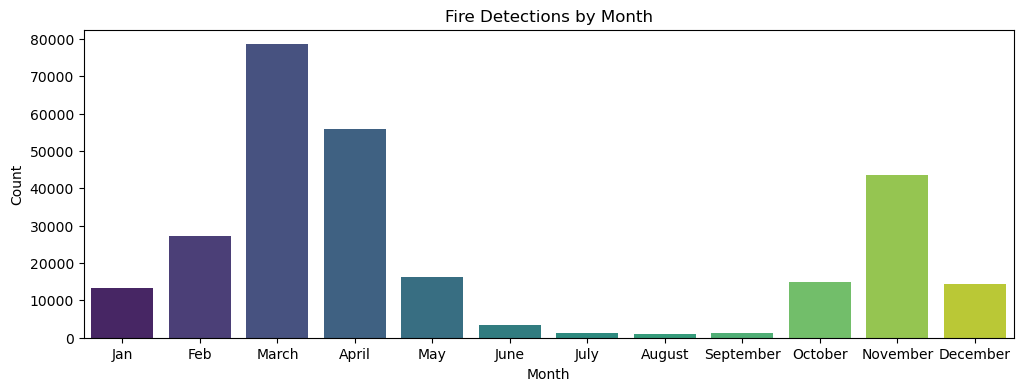

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x="month", data=df, palette="viridis")
plt.title('Fire Detections by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12),labels=["Jan", "Feb", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] )
plt.show()


C:\Users\kunsh\AppData\Local\Temp\ipykernel_53868\3523724595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day_of_week", data=df, palette="viridis")


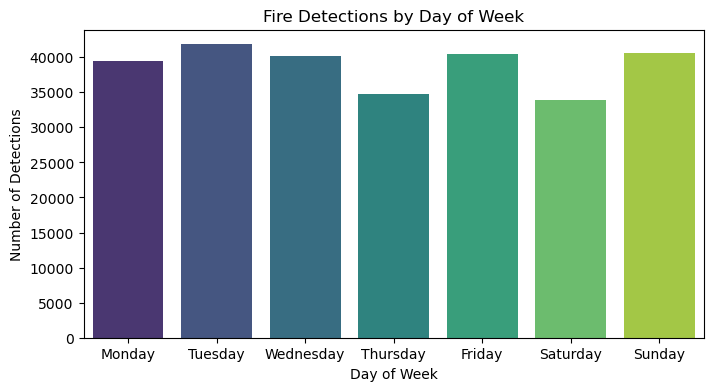

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x="day_of_week", data=df, palette="viridis")
plt.title('Fire Detections by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()


Visualize Outliers Using Boxplot

<Axes: >

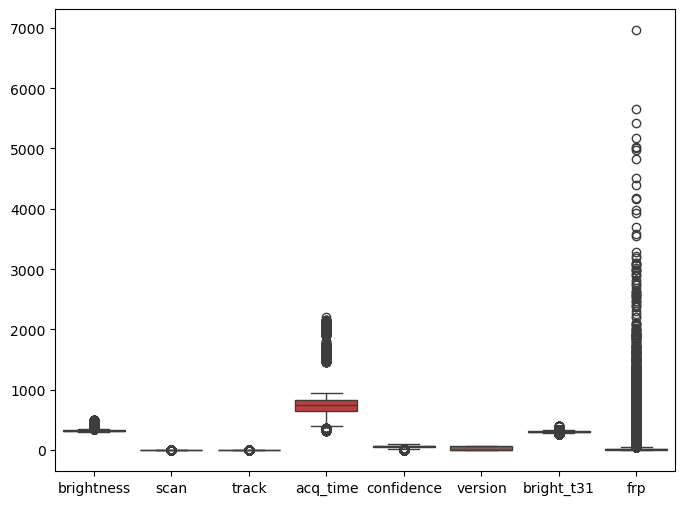

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[numerical_columns])

Removing Outliers

In [39]:
print("Shape before removing the outliers", df.shape)

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    df_cleaned = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)].copy()
    return df_cleaned
for cols in numerical_columns:
    df = remove_outliers(df, cols)
print("Shape before After the outliers", df.shape)

Shape before removing the outliers (271217, 20)
Shape before After the outliers (189370, 20)


Text(0, 0.5, 'Value')

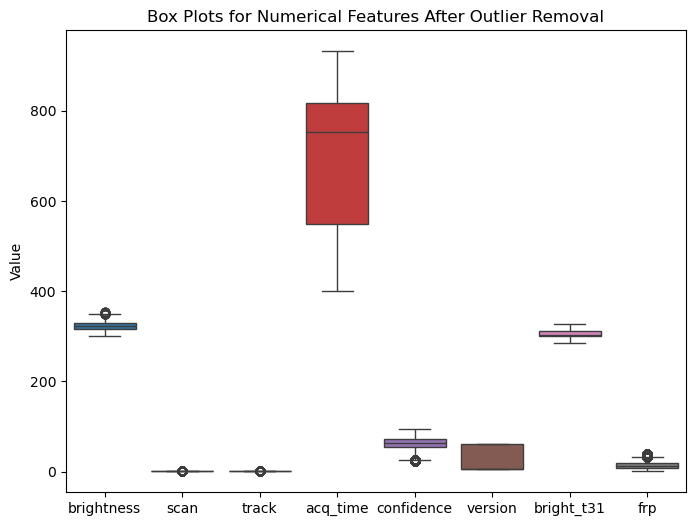

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')


In [41]:
df.head()

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0   28.0993    96.9983       303.0   1.1    1.1 2021-01-01       409   
1   30.0420    79.6492       301.8   1.4    1.2 2021-01-01       547   
3   30.0408    80.0501       302.0   1.5    1.2 2021-01-01       547   
4   30.6565    78.9668       300.9   1.3    1.1 2021-01-01       547   
6   31.4366    76.8988       300.5   1.0    1.0 2021-01-01       547   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          44     6.03       292.6   8.6        D     0   
1     Terra      MODIS          37     6.03       287.4   9.0        D     0   
3     Terra      MODIS          46     6.03       287.7  10.7        D     0   
4     Terra      MODIS          43     6.03       287.6   9.0        D     0   
6     Terra      MODIS          36     6.03       287.2   5.3        D     0   

   year  month  day_of_week  day_of_year  hour  
0  2021      1            4            1    20  
1  2021      1            4            1    20  
3  2021      1            4            1    20  
4  2021      1            4            1    20  
6  2021      1            4            1    20

In [44]:
df.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [49]:
catagorical_columns=df.select_dtypes(include="object").columns
catagorical_columns

Index(['satellite', 'instrument', 'daynight'], dtype='object')

In [52]:
catagorical_columns_to_encodde=catagorical_columns
df_encoded = pd.get_dummies(df, columns=catagorical_columns_to_encodde, drop_first=True)
df_encoded.head(100)

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0     28.0993    96.9983       303.0   1.1    1.1 2021-01-01       409   
1     30.0420    79.6492       301.8   1.4    1.2 2021-01-01       547   
3     30.0408    80.0501       302.0   1.5    1.2 2021-01-01       547   
4     30.6565    78.9668       300.9   1.3    1.1 2021-01-01       547   
6     31.4366    76.8988       300.5   1.0    1.0 2021-01-01       547   
..        ...        ...         ...   ...    ...        ...       ...   
116   23.7766    86.3997       313.8   1.0    1.0 2021-01-02       454   
117   23.6829    86.0831       310.4   1.1    1.0 2021-01-02       454   
118   23.6661    86.9215       308.2   1.0    1.0 2021-01-02       454   
119   23.8059    86.3222       313.5   1.0    1.0 2021-01-02       454   
120   23.8448    84.9512       310.7   1.2    1.1 2021-01-02       454   

     confidence  version  bright_t31   frp  type  year  month  day_of_week  \
0            44     6.03       292.6   8.6     0  2021      1            4   
1            37     6.03       287.4   9.0     0  2021      1            4   
3            46     6.03       287.7  10.7     0  2021      1            4   
4            43     6.03       287.6   9.0     0  2021      1            4   
6            36     6.03       287.2   5.3     0  2021      1            4   
..          ...      ...         ...   ...   ...   ...    ...          ...   
116          51     6.03       300.9   6.8     2  2021      1            5   
117          61     6.03       297.3   6.2     2  2021      1            5   
118          50     6.03       297.4   4.8     2  2021      1            5   
119          66     6.03       300.9   8.1     0  2021      1            5   
120          68     6.03       297.7   8.5     0  2021      1            5   

     day_of_year  hour  satellite_Terra  
0              1    20             True  
1              1    20             True  
3              1    20             True  
4              1    20             True  
6              1    20             True  
..           ...   ...              ...  
116            2    20             True  
117            2    20             True  
118            2    20             True  
119            2    20             True  
120            2    20             True  

[100 rows x 18 columns]

In [56]:
from textwrap import fill
from turtle import color
from altair import FillOpacity, Opacity
import folium


indian_map = folium.Map(location=[22.351115, 78.667743], zoom_start=5)
sample_df = df_encoded.sample(n=min(10000, len(df_encoded)), random_state=42)
for _,row in sample_df.iterrows():
    folium.CircleMarker(
        location=(row["latitude"], row["longitude"]),
        radius=3,
        color = "red",
        fill =True,
        fill_opacity = 0.6,

    ).add_to(indian_map)
display(indian_map)

Normalisation

In [57]:
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head(10)

latitude  longitude  brightness      scan     track   acq_date  acq_time  \
0    28.0993    96.9983   -2.308455 -0.464860  0.059274 2021-01-01       409   
1    30.0420    79.6492   -2.445530  0.588678  0.936416 2021-01-01       547   
3    30.0408    80.0501   -2.422684  0.939857  0.936416 2021-01-01       547   
4    30.6565    78.9668   -2.548336  0.237499  0.059274 2021-01-01       547   
6    31.4366    76.8988   -2.594027 -0.816039 -0.817867 2021-01-01       547   
7    29.5369    79.4559   -2.616873  0.588678  0.936416 2021-01-01       547   
8    30.5665    79.5317   -1.977192  0.588678  0.936416 2021-01-01       547   
9    31.2932    77.2750   -2.491221 -0.464860 -0.817867 2021-01-01       547   
10   29.5395    79.4419   -2.137112  0.588678  0.936416 2021-01-01       547   
11   30.4853    78.5828   -2.045729 -0.113680  0.059274 2021-01-01       547   

    confidence  version  bright_t31       frp  type  year  month  day_of_week  \
0    -1.319370     6.03   -1.754135 -0.735900     0  2021      1            4   
1    -1.818736     6.03   -2.471213 -0.683381     0  2021      1            4   
3    -1.176694     6.03   -2.429843 -0.460175     0  2021      1            4   
4    -1.390708     6.03   -2.443633 -0.683381     0  2021      1            4   
6    -1.890074     6.03   -2.498792 -1.169182     0  2021      1            4   
7    -2.104088     6.03   -2.154044 -1.037885     0  2021      1            4   
8    -2.817467     6.03   -1.726555 -0.368267     0  2021      1            4   
9    -1.961412     6.03   -2.085094 -1.300480     0  2021      1            4   
10   -0.249301     6.03   -2.016144 -0.538954     0  2021      1            4   
11   -0.106625     6.03   -1.974774 -0.433916     0  2021      1            4   

    day_of_year  hour  satellite_Terra  
0             1    20             True  
1             1    20             True  
3             1    20             True  
4             1    20             True  
6             1    20             True  
7             1    20             True  
8             1    20             True  
9             1    20             True  
10            1    20             True  
11            1    20             True

In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189370 entries, 0 to 271207
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   latitude         189370 non-null  float64       
 1   longitude        189370 non-null  float64       
 2   brightness       189370 non-null  float64       
 3   scan             189370 non-null  float64       
 4   track            189370 non-null  float64       
 5   acq_date         189370 non-null  datetime64[ns]
 6   acq_time         189370 non-null  int64         
 7   confidence       189370 non-null  float64       
 8   version          189370 non-null  float64       
 9   bright_t31       189370 non-null  float64       
 10  frp              189370 non-null  float64       
 11  type             189370 non-null  int64         
 12  year             189370 non-null  int32         
 13  month            189370 non-null  int32         
 14  day_of_week      189370 n